In [20]:
#mounting Drive..............
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
#locating directory where our files are stored.
import os
os.chdir('/content/drive/My Drive/Business_analytics/Marketing_analytics/')
!ls

clean_till_237_features       result_rfe_rf.csv
clean_till_538_features       SelectKbest_Result.csv
data_Cleaned_further_203.csv  slightly_edited_data_vmware.xlsx
final_Data_for_modelling.csv  till_203.csv
final_imp_feature.csv	      Training.csv
result_rfe_DT.csv	      tree_features.csv
result_rfe_DT_standard.csv    Vmware.ipynb


In [ ]:
#importing file....
import pandas as pd
data = pd.read_csv('data_Cleaned_further_203.csv')


In [ ]:
data.shape

(50006, 201)

In [ ]:
#removing unneccesary column.
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
#you can see complete list of columns....specially when data has 700 columns.
p = data.columns
for i in p:
    print(i)

In [ ]:
data['hyperthreading_active_flag'].isnull().sum()
#data['hyperthreading_active_flag']= data['hyperthreading_active_flag'].astype('category')
#r = data[data['hyperthreading_active_flag']=='NaN']
#r.shape

In [ ]:

#removing columns where initial null values 'NA' which has been treated as NaN by python and count exceeds 50%
tot = data.shape[0]
for i in data.columns:
   result = data[i].isnull().sum() 
   if result >= .5*tot:
    data.drop([i], axis=1,inplace=True)

In [ ]:
data.shape  #features remained  651.

(50006, 651)

In [ ]:
#Replacing all dubious values with NaN
values = [9999,'Unknown']

for i in values:
  data.replace(to_replace=i, value='NaN', inplace=True)


In [ ]:
#sample code to check if results are aligned and as expected.
options=['0']
rslt_df = data[(data['days_since_last_prodA_std_purchase_date'] == 'NaN') & (data['target'].isin(options))]
rslt_df.shape[0]

44453

In [ ]:
#taking out columns where missing values and target value is zero which is more than 50% of data. 
#does not contibute well to analysis. 
#distribution of  zero class is 97% in data. data is imbalanced. we have to keep this in mind while treating missing values
tot = data.shape[0]
options=['0']
for i in data.columns:
   rslt_df = data[(data[i] == 'NaN') & (data['target'].isin(options))] #these does not contribute much to analysis
   c = rslt_df.shape[0]
   if c >= .5*tot:
    data.drop([i], axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [ ]:
data.shape  #features remained.

(50006, 561)

In [ ]:
#changing data type.....
for i in data.columns:
  if data[i].nunique() < 8:
    data[i]= data[i].astype('category')

In [ ]:
#checking data type
for i in data.columns:
    print(i,data[i].dtypes)

In [ ]:
#check point one 
data_fc = data

In [ ]:
data.shape

(50006, 561)

In [ ]:
# sample code to extract values based on column condition
q = data[data['target']==0]
q.shape

(48670, 561)

In [ ]:
# this is the desired way of extracting values common to both columns......
rslt_df = data[(data['tot_page_views'] ==0) & (data['target']==0)]
rslt_df.shape

(110, 561)

In [ ]:
#checking values of relevant rows which satisfy above condition........
tot = data_fc.shape[0]
for i in data_fc.columns: 
    rslt_df = data_fc[(data_fc1[i] != 0) & (data_fc1['target']==0)]
    c = rslt_df.shape[0]
    if c >= 30000 and i != 'target':  #putting check if more than 70% values in a column are zero and target value is also zero,we can remov column as it does not have much variance. 
      print(i, c)

tot_page_views 48560
tot_page_views_l90d 30148
tot_visits 48670
tot_visits_l90d 30221
log_in_events 48542
product_view_events 48558
checkout_s1_events 48558
purchase_events 48670
tot_internal_ref_page_views 44786
tot_other_ref_page_views 48308
tot_windows_page_views 40624
tot_last_touch_natural_search_views 31990
tot_last_touch_direct_views 30331
db_city 48670
db_companyname 48670
db_country 48670
db_state 48670
db_audience 48670
masked_email 48670
flag_train 48670
ftr_dummy_gu_emp_segment_descUnknown 35788
ftr_dummy_idc_verticalsUnknown 35816
indices 48670


In [ ]:
#finding out columns where value 0 is in abundance more than 70% and target variable is zero as well.
tot = data_fc.shape[0]
for i in data_fc1.columns: 
    rslt_df = data_fc[(data_fc[i] != 0) & (data_fc['target']==0)]
    c = rslt_df.shape[0]
    if c >= 30000 and i != 'target':
      data_fc.drop([i], axis=1,inplace=True)

In [ ]:
data_fc.shape #remaining features.

(50006, 538)

In [ ]:
data_fc.to_csv('clean_till_538_features') #Saving file....

In [ ]:
l = [] #identifying columns with more than less than 1% values other than zero.
for i in data_fc.columns: 
    rslt_df = data_fc[data_fc[i] == 0]
    c = rslt_df.shape[0]
    if c > 49500:
      l.append(c)
    

In [ ]:
len(l)

301

In [ ]:
#removing columns where count of zero in column is more than 99%
tot = data_fc.shape[0]
for i in data_fc.columns: 
    rslt_df = data_fc[data_fc[i] == 0]
    c = rslt_df.shape[0]
    if c >= 49500 and i != 'target':
      data_fc.drop([i], axis=1,inplace=True)

In [ ]:
data_fc.shape

(50006, 237)

In [ ]:
data_fc.to_csv('clean_till_237_features')

In [ ]:
#checking distribution of values in each column.
for i in data_fc.columns:
  o = data_fc[i].value_counts()
  print(i,o)

In [ ]:
#identifying index of column........so that we can subset data based upon index numbers.
for count, key in enumerate(p):
  print(count,key)

In [ ]:
data.columns[1]

'tot_page_views_l30d'

## Below is some of the variable treatment to maked dataset more robust.

In [ ]:
#combining all browser page views in one single column and dropping all other columns as these will compress all information in one single columns.
data['tot_page_views_browser'] = data.iloc[:,19:24].sum(axis=1)
data = data.drop([data.columns[19],data.columns[20],data.columns[21],data.columns[22],data.columns[23],data.columns[24]], axis='columns')


In [ ]:
#totlal page views by OS of machine combined in one column. and dropping others.
data['tot_os_page_views']=data.iloc[:,19:24].sum(axis=1)
data.drop([data.columns[19],data.columns[20],data.columns[21],data.columns[22],data.columns[23],data.columns[24]], axis='columns', inplace=True)

In [ ]:
#combining total booking of product A in one column.
data['tot_prodA_booking_amount']=data.iloc[:,81:93].sum(axis=1)
data.drop([data.columns[81],data.columns[82],data.columns[83],data.columns[84],data.columns[85],data.columns[86],data.columns[87],data.columns[88],data.columns[89],data.columns[90],data.columns[91],data.columns[92]], axis='columns', inplace=True)

In [ ]:
#adding left out product A booking amount
data['tot_prodA_booking_amount_2']=data.iloc[:,83:86].sum(axis=1)

In [ ]:
#adding booking amount of product D to one column.
data['tot_prodD_booking_amount'] = data.iloc[:,84:86].sum(axis=1)

In [ ]:
#adding total amount for product F
data['tot_prodF_booking_amount'] = data.iloc[:,85:88].sum(axis=1)

In [ ]:
#dropping individual prod F column
data.drop([data.columns[86],data.columns[85],data.columns[87]],axis='columns', inplace=True)

In [ ]:
#adding total amount for product G
data['tot_prodG_booking_amount'] = data.iloc[:,85:88].sum(axis=1)

In [ ]:
#dropping individual prod G column
data.drop([data.columns[86],data.columns[85],data.columns[87]],axis='columns', inplace=True)

In [ ]:
#adding total amount for product H
data['tot_prodH_booking_amount'] = data.iloc[:,85:87].sum(axis=1)

In [ ]:
#dropping individual prod H column
data.drop([data.columns[85],data.columns[86]],axis='columns', inplace=True)

In [ ]:
data.shape #final shape after all treatment.

(50006, 208)

In [ ]:
#dropping columns which are correlated to other 
#total_Channel
#ProdA other pct change like ProdA_std, prodA_ent, 
data.drop([data.columns[141],data.columns[150],data.columns[151],data.columns[152],data.columns[153]],axis='columns', inplace=True)

In [ ]:
data.shape
data.to_csv('clean_till_203_features') #exporting this file.

(50006, 203)

# Predict subsequent action of customer. It will help personalizing targeting of potential customer.

It will help understanding next best action for customer This will help marketing team decide which action to advocate via personalized email.This can help customers contact in much more personalized manner. **bold text**

# Problem at hand is of prediction. 
# we want to predict correct stage for customer so that we can personalize marketing experience for customer.
#Feature Extraction.....

Here we will first plot the Pearson correlation heatmap and see the correlation of independent variables with the output variable Target. We will only select features which has correlation of above 0.5 (taking absolute value) with the output variable.
The correlation coefficient has values between -1 to 1
— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
— A value closer to 1 implies stronger positive correlation
— A value closer to -1 implies stronger negative correlation

In [ ]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data_2 = data

In [ ]:
#changing data type.....reimported file.
for i in data.columns:
  if data[i].nunique() < 8:
    data[i]= data[i].astype('category')

In [ ]:
data= pd.read_csv('till_203.csv')

In [ ]:
data_type = data.dtypes #making data frame of column name and data type.
data_type = pd.DataFrame(data_type)
data_type.index

Index(['Unnamed: 0', 'Unnamed: 0.1', 'tot_page_views_l30d', 'tot_visits_l30d',
       'internal_search_events', 'buy_now_events', 'download_trial_events',
       'support_search_events', 'get_pricing_events', 'form_success_events',
       ...
       'tgt_first_date_hol_page_view', 'tgt_first_date_any_download', 'target',
       'tot_page_views_browser', 'tot_os_page_views',
       'tot_prodA_booking_amount', 'tot_prodD_booking_amount',
       'tot_prodF_booking_amount', 'tot_prodG_booking_amount',
       'tot_prodH_booking_amount'],
      dtype='object', length=202)

In [ ]:
data_type.columns=['type'] #changing name of column.

In [ ]:
#segregating columns with non category type.
non_category_list = data_type.index[data_type['type'] != 'category'].tolist()

In [ ]:
non_category_list

In [ ]:
data_type['type'].value_counts() #checking distribution

float64     133
category     66
int64         1
category      1
category      1
Name: type, dtype: int64

In [ ]:
for i in data.columns:
  print(i,data[i].isnull().sum())   #finding columns with null values..... we still have two columns with blanks.

In [ ]:
data.drop(['total_employees','derived_total_employees'], axis=1, inplace=True) #deleting columns with blank value.

In [ ]:
#we also have some negative values in data set. we need to remove them.
#import data and apply this function without changing data type. because if you specify data type then you will have to implement changes as per category.
for i in non_category_list:
       data[data[i] < 0] = 9999


In [ ]:
values = [9999] #Replacing all dubious values with NaN

for i in values:
  data.replace(to_replace=i, value='NaN', inplace=True)


In [ ]:
data.dropna(axis='rows',inplace=True) #deleting all NaN values.

In [ ]:
lt = data.isnull().sum()  #checking if any missing value remains.
for i in lt:
  print(i)

In [ ]:
data['target'].value_counts()

0.0    40898
1.0      620
5.0      374
4.0       76
3.0       16
2.0        8
Name: target, dtype: int64

In [ ]:
data_2 = data

In [ ]:
data_2.to_csv('data_Cleaned_further_203.csv')

In [ ]:
#changing data type.....reimported file.
for i in data.columns:
  if data[i].nunique() < 8:
    data[i]= data[i].astype('category')

In [ ]:
#seperating target and remaining data set.
X = data

y = X['target']
X = X.drop(['target'], axis='columns')

In [ ]:
X.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'tot_page_views_l30d',
       'tot_visits_l30d', 'internal_search_events', 'buy_now_events',
       'download_trial_events', 'support_search_events', 'get_pricing_events',
       ...
       'ftr_dummy_idc_verticals9', 'tgt_first_date_hol_page_view',
       'tgt_first_date_any_download', 'tot_page_views_browser',
       'tot_os_page_views', 'tot_prodA_booking_amount',
       'tot_prodD_booking_amount', 'tot_prodF_booking_amount',
       'tot_prodG_booking_amount', 'tot_prodH_booking_amount'],
      dtype='object', length=202)

In [ ]:
X=X.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], axis='columns') #removing unnecessary columns.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
#apply SelectKBest class to extract top 10 best features
bestf = SelectKBest(score_func=chi2, k=40)
fit = bestf.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#making data frame
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['feature','Score']  #naming the dataframe columns


In [ ]:
featureScores.sort_values(by=['Score'])

,Specs,Score
147,prodC_booking_pct,4.176784e-01
146,prodB_booking_pct,8.417702e-01
151,prodG_booking_pct,1.052964e+00
164,ftr_dummy_db_industry10,1.202979e+00
174,ftr_dummy_highest_prodA_editionto1,1.902258e+00
...,...,...
81,total_2014_bookings_amount,1.309876e+08
194,tot_prodA_booking_amount,1.389576e+08
80,total_2013_bookings_amount,1.811424e+08
61,total_bookings_amount,1.888392e+08


In [ ]:
featureScores.to_csv('SelectKbest_Result.csv') #importing this result


Feature 0 (median income in a block) and feature 5 (number of households) of the California housing dataset have very different scales and contain some very large outliers. These two characteristics lead to difficulties to visualize the data and, more importantly, they can degrade the predictive performance of many machine learning algorithms. Unscaled data can also slow down or even prevent the convergence of many gradient-based estimators.

Indeed many estimators are designed with the assumption that each feature takes values close to zero or more importantly that all features vary on comparable scales. In particular, metric-based and gradient-based estimators often assume approximately standardized data (centered features with unit variances). A notable exception are decision tree-based estimators that are robust to arbitrary scaling of the data.

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) assume that all features are centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

The function scale provides a quick and easy way to perform this operation on a single array-like dataset

In [ ]:
#standardizing Data.
names= X.columns
from sklearn import preprocessing
 #robust scaler takes care of outliers in data.
scaler = preprocessing.RobustScaler().fit(X)
X_t = scaler.transform(X)
X_t = pd.DataFrame(X_t, columns=names)

In [ ]:
X_t

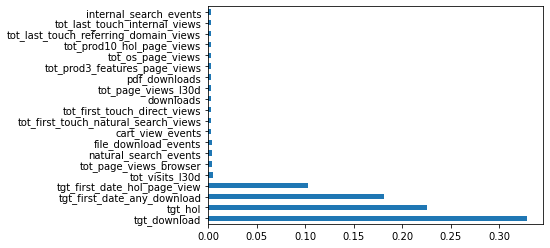

In [ ]:
#important feature extraction bt tree based models.
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
#plot graph
f_imp = pd.Series(model.feature_importances_, index=X.columns)
f_imp.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
feat_importances.to_csv('tree_features.csv') #exporting

In [ ]:
from sklearn.feature_selection import RFECV  #recursive feature elimination using cross validation.
from sklearn.ensemble import RandomForestClassifier


In [ ]:

clf=RandomForestClassifier(n_estimators=100)
model = RFECV(clf, step=1, cv=5)
model = model.fit(X, y)

In [ ]:
status = model.support_

In [ ]:
rank = model.ranking_

In [ ]:
zip_list = list(zip(status,rank))

In [ ]:
result_rfe = pd.DataFrame(zip_list, columns=['status','rank'], index=X.columns)

In [ ]:
result_rfe.status.value_counts()

False    197
True       2
Name: status, dtype: int64

In [ ]:
result_rfe.to_csv('result_rfe_rf.csv')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_2=DecisionTreeClassifier()
model = RFECV(clf_2, step=1, cv=5)
model = model.fit(X_t, y)
status_DT = model.support_
rank_DT = model.ranking_
com_list = list(zip(status_DT,rank_DT))
result_rfe_DT = pd.DataFrame(com_list, columns=['status_DT','rank_DT'], index=X.columns)
result_rfe_DT.to_csv('result_rfe_DT_standard.csv')


In [ ]:
result_rfe_DT['status_DT'].value_counts()

False    197
True       2
Name: status_DT, dtype: int64

In [ ]:
#we will take common features which are coming as a result of tree based models and Select K best in building models.

In [ ]:
#locating directory where our files are stored.
import os
os.chdir('/content/drive/My Drive/Business_analytics/Marketing_analytics/')
!ls

clean_till_237_features       result_rfe_rf.csv
clean_till_538_features       SelectKbest_Result.csv
data_Cleaned_further_203.csv  slightly_edited_data_vmware.xlsx
final_Data_for_modelling.csv  till_203.csv
final_imp_feature.csv	      Training.csv
result_rfe_DT.csv	      tree_features.csv
result_rfe_DT_standard.csv    Vmware.ipynb


In [ ]:
import pandas as pd
data = pd.read_csv('data_Cleaned_further_203.csv')

In [ ]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'tot_page_views_l30d',
       'tot_visits_l30d', 'internal_search_events', 'buy_now_events',
       'download_trial_events', 'support_search_events', 'get_pricing_events',
       ...
       'tgt_first_date_hol_page_view', 'tgt_first_date_any_download', 'target',
       'tot_page_views_browser', 'tot_os_page_views',
       'tot_prodA_booking_amount', 'tot_prodD_booking_amount',
       'tot_prodF_booking_amount', 'tot_prodG_booking_amount',
       'tot_prodH_booking_amount'],
      dtype='object', length=203)

In [ ]:
data.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], axis = 'columns', inplace=True)

In [ ]:
#importing selected feature data frame.
import pandas as pd
Skb = pd.read_csv('SelectKbest_Result.csv')
tree = pd.read_csv('tree_features.csv')
RF = pd.read_csv('result_rfe_rf.csv')

In [ ]:
Skb.shape

(199, 3)

In [ ]:
Skb.columns

Index(['Unnamed: 0', 'Specs', 'Score'], dtype='object')

In [ ]:
Skb['feature_rank'] = Skb['Score'].rank(ascending=False) #ranking based on score.

In [ ]:
Skb.head()

,Unnamed: 0,Specs,Score,feature_rank
0,0,tot_page_views_l30d,1.616621e+06,20.0
1,1,tot_visits_l30d,3.467841e+05,28.0
2,2,internal_search_events,1.294151e+05,35.0
3,3,buy_now_events,1.132608e+02,114.0
4,4,download_trial_events,3.112319e+03,76.0


In [ ]:
Skb = Skb.set_index(Skb['feature_rank']) #setting index of rank
Skb.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
Skb.head()

,Specs,Score,feature_rank
feature_rank,,,
20.0,tot_page_views_l30d,1.616621e+06,20.0
28.0,tot_visits_l30d,3.467841e+05,28.0
35.0,internal_search_events,1.294151e+05,35.0
114.0,buy_now_events,1.132608e+02,114.0
76.0,download_trial_events,3.112319e+03,76.0


In [ ]:
Skb = Skb.sort_index() #sorting on rank index.

In [ ]:
desired_feature = Skb[Skb['feature_rank']<= 40] #extracting top 40.

In [ ]:
desired_feature.shape

(40, 3)

In [ ]:
tree.columns = ['features','score']
tree['features']

0           tot_page_views_l30d
1               tot_visits_l30d
2        internal_search_events
3                buy_now_events
4         download_trial_events
                 ...           
194    tot_prodA_booking_amount
195    tot_prodD_booking_amount
196    tot_prodF_booking_amount
197    tot_prodG_booking_amount
198    tot_prodH_booking_amount
Name: features, Length: 199, dtype: object

In [ ]:
#same set of steps for trees.
tree['feature_rank_tree'] = tree['score'].rank(ascending=False) #ranking based on score.
#Skb.drop(['Unnamed: 0'], axis=1, inplace=True)
tree = tree.set_index(tree['feature_rank_tree']) #setting index of rank
tree = tree.sort_index() #sorting on rank index.
desired_feature_tree = tree[tree['feature_rank_tree']<= 40] #extracting top 40.

In [ ]:
desired_feature_tree

,features,score,feature_rank_tree
feature_rank_tree,,,
1.0,tgt_download,0.328726,1.0
2.0,tgt_hol,0.225016,2.0
3.0,tgt_first_date_any_download,0.180696,3.0
4.0,tgt_first_date_hol_page_view,0.102509,4.0
5.0,tot_visits_l30d,0.005131,5.0
6.0,tot_page_views_browser,0.003930,6.0
7.0,natural_search_events,0.003901,7.0
8.0,file_download_events,0.003637,8.0
9.0,cart_view_events,0.003158,9.0


In [ ]:
combined_feature_Set = pd.concat([desired_feature,desired_feature_tree], axis= 1)

In [ ]:
combined_feature_Set

In [ ]:
import numpy as np
imp_feature = list(np.unique(combined_feature_Set[['Specs', 'features']].values))

In [ ]:
imp_feature.append('target')

In [ ]:
combined_feature_Set.to_csv('final_imp_feature.csv')
len(imp_feature)

58

In [ ]:

cols = imp_feature
final_set_formodel = data[cols]
    

In [ ]:
final_set_formodel.shape

(41992, 58)

In [ ]:
final_set_formodel.to_csv('final_Data_for_modelling.csv')

How to Use One-vs-Rest and One-vs-One for Multi-Class Classification
by Jason Brownlee on April 13, 2020 in Ensemble Learning
Tweet  Share
Last Updated on June 26, 2020

Not all classification predictive models support multi-class classification.

Algorithms such as the Perceptron, Logistic Regression, and Support Vector Machines were designed for binary classification and do not natively support classification tasks with more than two classes.


We will evaluate candidate models using repeated stratified k-fold cross-validation.

The k-fold cross-validation procedure provides a good general estimate of model performance that is not too optimistically biased, at least compared to a single train-test split. We will use k=5, meaning each fold will contain about 214/5, or about 42 examples.

Stratified means that each fold will aim to contain the same mixture of examples by class as the entire training dataset. Repeated means that the evaluation process will be performed multiple times to help avoid fluke results and better capture the variance of the chosen model. We will use three repeats.

This means a single model will be fit and evaluated 5 * 3 or 15 times and the mean and standard deviation of these runs will be reported.

This can be achieved using the RepeatedStratifiedKFold scikit-learn class.

All classes are equally important. There are minority classes that are only represented with 4 percent or 6 percent of the data, yet no class has more than about 35 percent dominance of the dataset.

As such, in this case, we will use classification accuracy to evaluate models.

In [ ]:
#mounting Drive..............
from google.colab import drive
drive.mount('/content/drive')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [23]:
import pandas as pd
data = pd.read_csv('final_Data_for_modelling.csv')

In [24]:
data.columns

Index(['Unnamed: 0', 'campaign_src_events', 'campaign_view_events',
       'cart_add_events', 'cart_open_events', 'cart_view_events',
       'datasheet_downloads', 'download_trial_events', 'downloads',
       'file_download_events', 'form_success_events',
       'ftr_dummy_db_industryUnknown', 'internal_search_events',
       'linkedin_views', 'natural_search_events', 'pdf_downloads',
       'sum_num_of_employees', 'support_search_events', 'tgt_download',
       'tgt_first_date_any_download', 'tgt_first_date_hol_page_view',
       'tgt_hol', 'tot_first_touch_direct_views',
       'tot_first_touch_internal_views',
       'tot_first_touch_natural_search_views',
       'tot_first_touch_referring_domain_views',
       'tot_first_touch_src_codes_views', 'tot_last_touch_cid_codes_views',
       'tot_last_touch_internal_views',
       'tot_last_touch_referring_domain_views',
       'tot_last_touch_src_codes_views', 'tot_os_page_views',
       'tot_page_views_browser', 'tot_page_views_l30d',
 

In [25]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [26]:
data.shape

(41992, 58)

In [64]:
#data.dtypes
#change data type
for i in data.columns:
  if data[i].nunique() < 8:
    data[i]= data[i].astype('category')

In [65]:
data['target'].dtypes

CategoricalDtype(categories=[0.0, 1.0, 2.0], ordered=False)

In [66]:
data['target'].value_counts()

0.0    40898
1.0      620
2.0      474
Name: target, dtype: int64

In [34]:
target = list(data['target'])

In [47]:
data.drop(['target'],axis=1,inplace=True)

In [ ]:
target

In [56]:
#combining 2,3,4,5 into one category. It will help us narrow down classification approaches.
for n, i in enumerate(target):
  if i == 2 or i == 3 or i==4 or i == 5:
    target[n] = 2


In [61]:
data['target']= target
data.to_csv('final_data_category_modification.csv')

In [62]:
data['target'].value_counts()
# 1 is all actions exclusing download, webinar and HOL
# 0 is Visited website but no action was chosen
# 2 any one action taken among HOL, Webinar and downlaod.

0.0    40898
1.0      620
2.0      474
Name: target, dtype: int64

In [59]:
#seperating target and remaining data set.
X = data

y = X['target']
X = X.drop(['target'], axis='columns')

In [67]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [91]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [ ]:
#SVM with one vs rest classification using cross validation
model = LinearSVC(multi_class='ovr', class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
score = cross_val_score(model, X, y, scoring='balanced_accuracy', cv=cv, n_jobs=-1) #evaluation
svm_score = pd.DataFrame(score)

In [ ]:
#svm_score = pd.DataFrame(score)
svm_score.to_csv('SVM_result_balanced_Acc.csv')

In [79]:
#LR with one vs rest classification using cross validation and using roc_auc metric for evaluation
model = LogisticRegression(multi_class='ovr', class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
score = cross_val_score(model, X, y, scoring='roc_auc_ovr', cv=cv, n_jobs=-1) #evaluation
LR_score_rocauc = pd.DataFrame(score)
LR_score_rocauc.to_csv('LR_result_ROC_AUC.csv')


In [81]:
#LR with one vs rest classification using cross validation(K to 10) and using roc_auc metric for evaluation
model = LogisticRegression(multi_class='ovr', class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
score = cross_val_score(model, X, y, scoring='roc_auc_ovr', cv=cv, n_jobs=-1) #evaluation
LR_score_rocauc2 = pd.DataFrame(score)
LR_score_rocauc2.to_csv('LR_result_ROC_AUC.csv') #for K=10

In [83]:
LR_score_rocauc2.mean()

0    0.749489
dtype: float64

In [85]:
#RF with one vs rest classification using cross validation
model = RandomForestClassifier(class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
score = cross_val_score(model, X, y, scoring='balanced_accuracy', cv=cv, n_jobs=-1) #evaluation
RF_score_Balanced_acc = pd.DataFrame(score)
RF_score_Balanced_acc.to_csv('RF_score_balanced_Acc.csv')

In [92]:
#RF with one vs rest classification using cross validation
model = RandomForestClassifier(class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
score = cross_val_score(model, X, y, scoring='f1_micro', cv=cv, n_jobs=-1) #evaluation
RF_score_f1 = pd.DataFrame(score)
RF_score_f1.to_csv('RF_score_Prc.csv')

In [93]:
RF_score_f1.mean()

0    0.999397
dtype: float64

In [94]:
#SVM with one vs rest classification using cross validation
model = LinearSVC(multi_class='ovr', class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
score = cross_val_score(model, X, y, scoring='f1_micro', cv=cv, n_jobs=-1) #evaluation
svm_score_f1 = pd.DataFrame(score)
svm_score_f1.to_csv('svm_score_f1.csv')

In [95]:
svm_score_f1.mean()

0    0.943854
dtype: float64

In [96]:
#LR with one vs rest classification using cross validation and using f1_micro for evaluation
model = LogisticRegression(multi_class='ovr', class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
score = cross_val_score(model, X, y, scoring='f1_micro', cv=cv, n_jobs=-1) #evaluation
LR_score_f1_micro = pd.DataFrame(score)
LR_score_f1_micro.to_csv('LR_result_f1_micro.csv')

In [97]:
LR_score_f1_micro.mean()

0    0.05501
dtype: float64